<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_09_WordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = 'https://drek4537l1klr.cloudfront.net/chollet/Figures/06fig02.jpg' width =500 height =400>


### **[Source code](https://livebook.manning.com/book/deep-learning-with-python/chapter-6/38)**

## **1. Word-level one-hot encoding (toy example)**

In [ ]:
import numpy as np

# 샘플 문장 리스트
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어 인덱스 생성
token_index = {}
for sample in samples:
    # 각 문장을 단어로 분할하고, 각 단어에 대해 인덱스를 생성합니다.
    for word in sample.split():
        word = word.strip('.').lower()  # 문장 부호 제거 및 소문자로 변환하여 중복 단어 문제 해결
        if word not in token_index:
            # 단어가 아직 인덱스에 없으면 새로운 인덱스를 할당합니다.
            token_index[word] = len(token_index) + 1

# 최대 길이 정의
max_length = 10

# 결과 저장을 위한 넘파이 배열 생성
# num_samples: 샘플의 수 (문장의 수)
# num_tokens: 고유 단어의 총 개수 + 1 (인덱스가 1부터 시작하므로 +1 필요)
num_samples = len(samples)
num_tokens = max(token_index.values()) + 1
results = np.zeros((num_samples, max_length, num_tokens))

# 샘플을 인코딩하여 결과 배열에 저장
for i, sample in enumerate(samples):
    # 각 샘플 문장을 단어 단위로 분할하고 최대 길이까지만 처리합니다.
    for j, word in enumerate(sample.split()[:max_length]):
        word = word.strip('.').lower()  # 문장 부호 제거 및 소문자로 변환하여 중복 단어 문제 해결
        # 해당 단어의 인덱스를 가져옵니다.
        index = token_index.get(word)
        if index is not None:
            # 해당 위치에 해당 단어의 인덱스에 대해 1을 설정하여 원-핫 인코딩을 수행합니다.
            results[i, j, index] = 1.

# 결과 출력 (디버깅을 위해 추가 가능)
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [ ]:
# 데이터프레임으로 변환하기 위해 단어 리스트 생성
import pandas as pd

columns = list(token_index.keys())

data = []
for i in range(num_samples):
    for j in range(max_length):
        row = []  # 위치 정보 제거
        for word, index in token_index.items():
            row.append(results[i, j, index])
        data.append(row)

# 데이터프레임 생성
df = pd.DataFrame(data, columns=columns)
df

,the,cat,sat,on,mat,dog,ate,my,homework
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


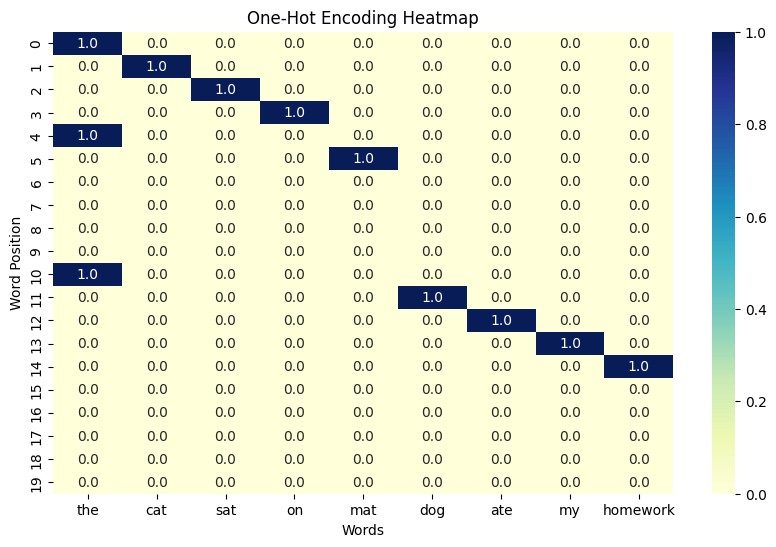

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".1f")  # Use a suitable colormap and format
plt.title("One-Hot Encoding Heatmap")
plt.xlabel("Words")
plt.ylabel("Word Position")
plt.show()

## **2. Using Keras for word-level one-hot encoding**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=20)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index

print(sequences)
print(one_hot_results)
print(word_index)
print(f'Found {len(word_index)} unique tokens.')


[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
Found 9 unique tokens.


In [ ]:
df = pd.DataFrame(one_hot_results)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.iloc[:, 1:10]
df.columns = word_index.keys()
df

,the,cat,sat,on,mat,dog,ate,my,homework
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


## **3. Embedding**
- 입력 차원 (input_dim): 1000 — 어휘 크기로. 즉, 이 모델에서는 최대 1000개의 고유한 단어를 학습할 수 있음
- 출력 차원 (output_dim): 64 — 각 단어를 64차원의 실수 벡터로 임베딩, Embedding 레이어는 학습 초기에는 임의의 가중치를 갖고 시작하며, 이후 학습 과정에서 가중치가 업데이트되어 각 단어의 임베딩을 학습하게 되는데 이 임베딩 벡터는 학습을 통해 문맥 정보를 점차 반영

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64) # token 1000개, 차원은 20차원
embedding_layer

<Embedding name=embedding, built=False>

In [ ]:
embedding_layer.get_weights()

[]

### **The embedding_layer is Empty [ ] because the embedding layer is not yet initialized with any data. When an embedding layer is first created, it does not have any weights assigned until it is used in a model and trained or initialized.**

In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# 샘플 문장
samples = ['The cat sat on the mat', 'The dog ate my homework']

# Step 1: 텍스트 샘플 토큰화
tokenizer = Tokenizer(num_words=100)  # 데이터셋에서 상위 100개의 단어만 고려합니다.

# 제공된 샘플에 대해 토크나이저를 학습시켜 단어 인덱스를 생성합니다.
tokenizer.fit_on_texts(samples)

# 각 텍스트 샘플을 단어 인덱스를 기반으로 정수 시퀀스로 변환합니다.
sequences = tokenizer.texts_to_sequences(samples)
print(sequences)

# 단어 인덱스 사전 (단어를 정수로 매핑)
word_index = tokenizer.word_index
print(f'word_index의 길이: {len(word_index)}')
print(f'Word index: {word_index}')  # 단어가 어떻게 정수로 매핑되었는지 확인하기 위해 단어 인덱스를 출력합니다.



[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
word_index의 길이: 9
Word index: {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [ ]:
# Step 2: 시퀀스를 패딩하여 일정한 길이로 맞추기
# 모든 시퀀스가 동일한 길이 (maxlen=10)를 가지도록 패딩하여 신경망에 규격화하여 입력하기 위해 필요
# 짧은 시퀀스는 시작 부분에 0으로 패딩되고, 긴 시퀀스는 시작 부분이 잘리니 word_index의 길이에 1개를 더해서

data = pad_sequences(sequences, maxlen=10)
print(f'Padded sequences: \n{data}')  # 일정한 길이로 패딩된 시퀀스를 출력하여 확인합니다.
print(samples[0])
print(samples[1])

Padded sequences: 
[[0 0 0 0 1 2 3 4 1 5]
 [0 0 0 0 0 1 6 7 8 9]]
The cat sat on the mat
The dog ate my homework


In [ ]:
# Step 3: 임베딩 모델 정의

# 어휘의 크기 설정
vocab_size = len(word_index) + 1  # 어휘 크기 (+1은 패딩에 사용되는 0 인덱스 때문)
embedding_dim = 8  # 임베딩 벡터의 차원 (각 단어 벡터의 크기 정의)
print(f'vocab_size : {vocab_size}')


# Sequential 모델 생성
model = Sequential()

# input_dim=vocab_size: 어휘의 크기를 의미하며, 총 단어의 수를 입력, 이 값은 모델이 사용할 단어 수를 의미
# output_dim=embedding_dim: 각 단어를 몇 차원의 벡터로 표현할지를 결정, 8차원으로 설정했기 때문에, 각 단어는 8개의 실수로 표현됩
# input_length=10: 입력 시퀀스의 길이를 의미하며, 이 모델에서는 각 시퀀스가 최대 10개의 단어로 구성되도록 패딩
model.add(Embedding
                    (input_dim= vocab_size,
                    output_dim= embedding_dim,
                    input_length= 10)
        )

# 임베딩 레이어의 출력은 (batch_size= None, input_length, output_dim) 형상
# 각 시퀀스는 (10, 8)의 크기를 가진 행렬로 표현되며, 이를 Flatten() 레이어를 통해 평탄화하여 (10*8) 형태로 변환
model.add(Flatten())

# 단일 출력 유닛과 sigmoid 활성화 함수를 갖는 Dense 레이어 추가
# 이 레이어는 이진 분류에 사용됩니다.
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
# 'adam' 옵티마이저와 이진 분류에 적합한 'binary_crossentropy' 손실 함수 사용
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력 (레이어, 파라미터, 출력 형태 등)
model.summary()


vocab_size : 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###
- 입력 시퀀스가 'The cat sat on the mat'와 같은 문장일 경우, 이 문장은 각 단어가 정수 인덱스로 변환된 후, 임베딩 레이어를 통과하면서 8차원 벡터로 매핑

- 예를 들어, "The"라는 단어가 [0.2, -0.5, 0.1, ..., 0.3]와 같은 8개의 요소(차원)로 이루어진 벡터로 변환됩니다.

- 시퀀스의 각 단어마다 8차원 벡터가 할당되기 때문에, 전체 문장은 10개의 단어로 구성된 10 x 8 크기의 행렬로 표현되며 이 행렬은 다음과 같은 형태:

>| 단어 번호 | 단어명  | 벡터 요소 1 | 벡터 요소 2 | 벡터 요소 3 | 벡터 요소 4 | 벡터 요소 5 | 벡터 요소 6 | 벡터 요소 7 | 벡터 요소 8 |
|-----------|---------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| 1         | the     | 0.2         | -0.5        | 0.1         | ...         | ...         | ...         | ...         | 0.3         |
| 2         | cat     | 0.1         | 0.4         | -0.7        | ...         | ...         | ...         | ...         | 0.2         |
| ...       | ...     | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...         |
| 10        | mat     | 0.6         | -0.3        | 0.5         | ...         | ...         | ...         | ...         | 0.7         |

>> 각 행은 시퀀스에서의 단어 번호, 각 열은 각 단어의 임베딩 벡터 요소를 표시



> - **(10, 8)**의 의미는 10개의 단어가 각각 8차원 벡터로 표현되며 이 출력은 배치 크기와 관련이 없는 한 개의 시퀀스에 대한 형태로 모델은 배치 내의 각 시퀀스에 대해 이와 동일한 임베딩 출력을 생성
> - 임베딩 레이어의 목적은 단어를 단순한 정수 인덱스 대신 실수 벡터로 표현하여, 학습을 통해 단어의 의미와 관계를 반영하는 벡터로 만들어 주게 되어 이 벡터 공간에서 유사한 의미를 가진 단어들이 서로 가까이 위치하게 됨



In [ ]:
# Tokenizer에서 생성된 word_index
# 정수 인덱스를 키로 하여 단어를 찾기 위한 인덱스 역전 사전 생성
index_word = {v: k for k, v in word_index.items()}

# 단어 인덱스와 단어명을 출력합니다.
for i in range(1, len(word_index) + 1):
    print(f'단어 번호 {i}: {index_word[i]}')

단어 번호 1: the
단어 번호 2: cat
단어 번호 3: sat
단어 번호 4: on
단어 번호 5: mat
단어 번호 6: dog
단어 번호 7: ate
단어 번호 8: my
단어 번호 9: homework


In [ ]:
# Step 4: 학습을 위한 더미 레이블 생성
# 두 개의 입력 문장에 대한 더미 레이블을 생성합니다 (단순 시연 목적)
labels = np.array([0, 1])  # 두 샘플 문장에 해당하는 레이블, 긍정과 부정 예를 들어

In [ ]:
# Step 5: 모델 학습 (시연 목적으로)
# 데이터와 더미 레이블로 10 에포크 동안 모델을 학습시킵니다.
# 이 단계는 데이터셋이 매우 작기 때문에 단순 시연을 위한 것입니다.
model.fit(data, labels, epochs=10)

# Step 6: 단어 임베딩 추출 및 출력
# 모델에서 임베딩 레이어를 가져와 학습된 가중치를 추출합니다.
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]  # 임베딩 행렬 (각 행이 단어 벡터를 나타냅니다)

print(f'Word Embeddings: \n{embeddings}')  # 학습된 단어 임베딩 벡터를 출력합니다.

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7037
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5000 - loss: 0.7008
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5000 - loss: 0.6980
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6951
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5000 - loss: 0.6923
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5000 - loss: 0.6895
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5000 - loss: 0.6867
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5000 - loss: 0.6840
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.6812
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6785
Word Embeddings: 
[[ 0.02362759 -0.02036387 -0.04803541 -0.01687421  0.04027223 -0.01991159
  -0.04326574  0.02928841]
 [ 0.01869172  0.02079422 -0.03775145  0.0342966

In [ ]:
embeddings.shape

(10, 8)

In [ ]:
embeddings

array([[ 0.02362759, -0.02036387, -0.04803541, -0.01687421,  0.04027223,
        -0.01991159, -0.04326574,  0.02928841],
       [ 0.01869172,  0.02079422, -0.03775145,  0.03429664,  0.00762483,
        -0.01909067, -0.00578876, -0.04113076],
       [-0.01915884, -0.01636155,  0.03867028,  0.00386042, -0.03992076,
        -0.02174703,  0.03911131, -0.04595999],
       [ 0.05651664,  0.03849685,  0.02477357,  0.00431008,  0.00471023,
        -0.02833369, -0.00550205, -0.026233  ],
       [ 0.01182068, -0.0372588 , -0.0515287 ,  0.02335832,  0.04794384,
        -0.00607797,  0.0002677 , -0.03559786],
       [ 0.00942143,  0.03530277, -0.01616509, -0.0179311 , -0.04053612,
        -0.00656517,  0.00418189,  0.00377223],
       [-0.02816926,  0.01667799,  0.03582017, -0.0191868 ,  0.02119793,
         0.02051762,  0.00062933,  0.01001569],
       [-0.02411392, -0.0307076 ,  0.0446311 ,  0.03486956, -0.01335566,
        -0.04743585, -0.03492977, -0.0084245 ],
       [ 0.03197096,  0.05933537

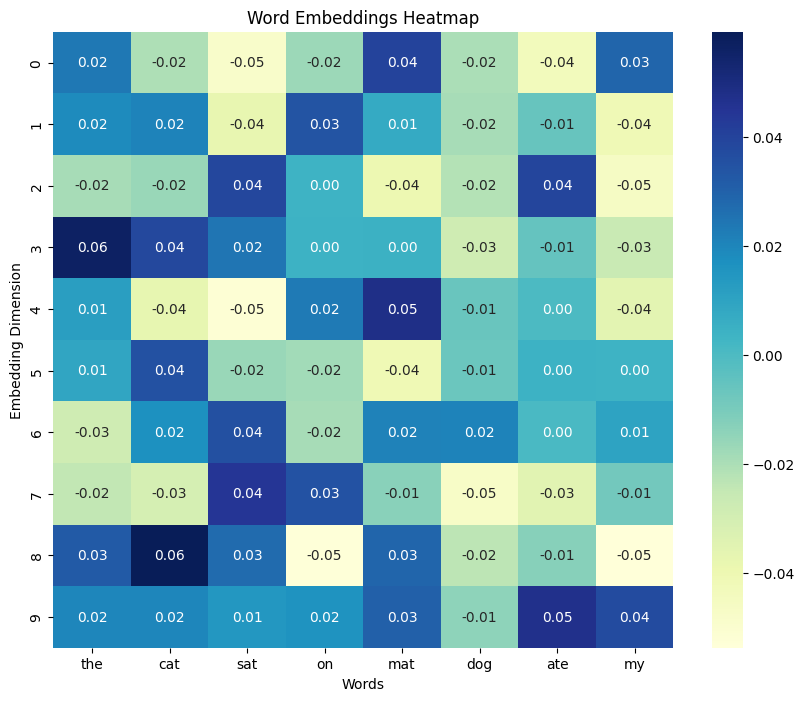

In [ ]:
# Create a DataFrame for the heatmap
embedding_df = pd.DataFrame(embeddings)

# Set column names to words (if available)
if 'word_index' in locals():
    # Sort word_index by index values and get the corresponding words
    word_list = [word for word, index in sorted(word_index.items(), key=lambda item: item[1])]

    # Ensure the word_list length matches the number of columns in embedding_df
    word_list = word_list[:embedding_df.shape[1]]

    embedding_df.columns = word_list
else:
    # If word_index is not available, use generic column names
    embedding_df.columns = [f"Dimension {i+1}" for i in range(embedding_df.shape[1])]


# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(embedding_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Word Embeddings Heatmap")
plt.xlabel("Words")
plt.ylabel("Embedding Dimension")
plt.show()

### **[Embedding](https://projector.tensorflow.org/)**